# peaks Tutorial 7: Time-resolved ARPES data

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
%aimport peaks

from peaks import *

## Loading data

You can load data in the normal way using the `load_data` command

In [4]:
a = load_data("example_data/ARPES/014 TiSe2")

An additional set of options can be supplied by calling with a `Artemis_kw={}` dictionary as an additional argument. This allows the following options (defaults shown here): `Artemis_kw={'Ang_Offset_px': 0, 'Edge_pos': 10, 'Edge_slope': -1, 'N': None}`
 - The first three arguments are for the angle transformation from the MCP image.
 - The last option specifies the number of scans to load up to. By default, all are loaded, but a smaller number can be specified by calling with e.g. `Artemis_kw={'N': 100}` where you want to load only the first 100 iterations.

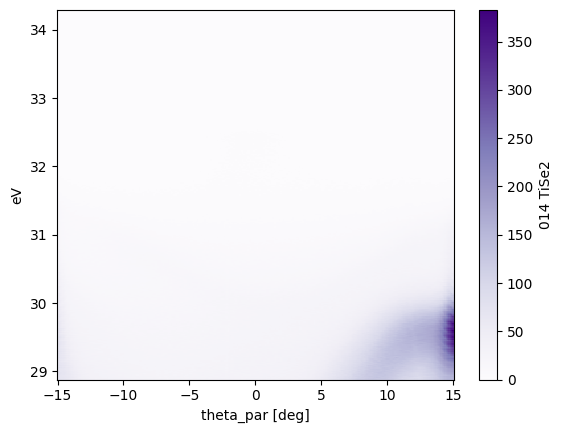

In [6]:
a.mean('t').plot()

Cropping can be performed in the usual way, also directly on load

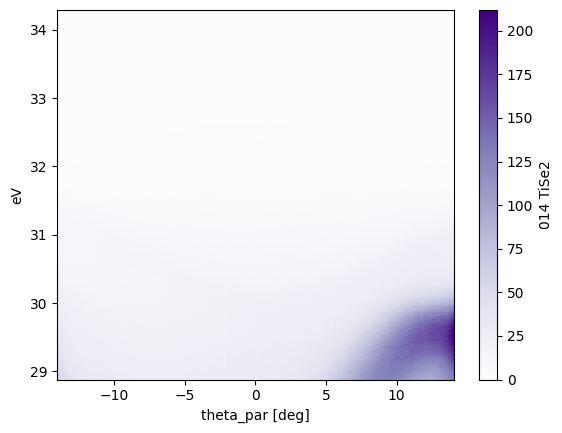

In [7]:
a = load_data("example_data/ARPES/014 TiSe2", theta_par=slice(-14,14))
a.mean('t').plot()

## Selecting data
Beyond the usual methods, there are some additional helper functions for time-resolved data.

The static ARPES data (i.e. data before the pump) can be extracted using the function `static`

In [8]:
help(static)

Help on function static in module peaks.display.trARPES:

static(data, t_static=-250.0)
    Calculate the static ARPES from a time-resolved ARPES experiment.
    Assumes that all data points recorded for a time < t_static are equilibrium.
    
    Parameters
    -----------
    data : xr.DataArray
        raw data (t x E x ang)
    
    t_static : float, optional
        time point to assume static up to (fs)
        default = -250 fs



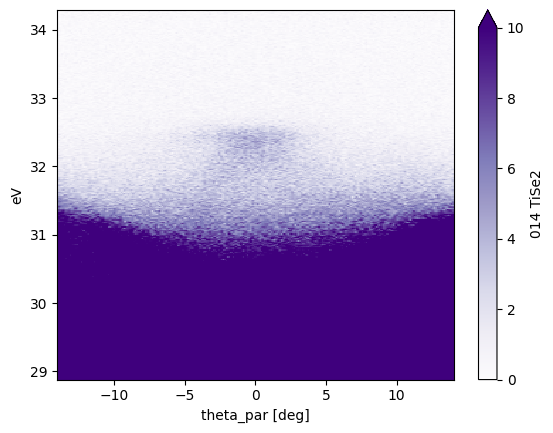

In [9]:
a.static().plot(vmax=10)

Can use our standard e.g. MDC and EDC functions to select from the data and broadcast over the time axis to get some nicer displays of the data


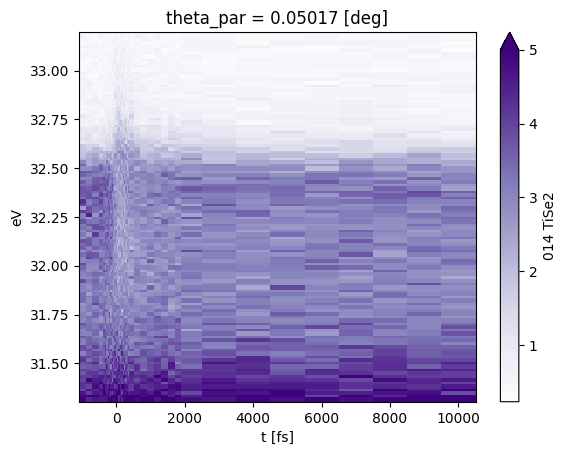

In [14]:
a.EDC(ang0=0,dang=6).sel(eV=slice(31.3,33.2)).plot(y='eV', vmax=5)

Can then easily pull out dynamics from a ROI:

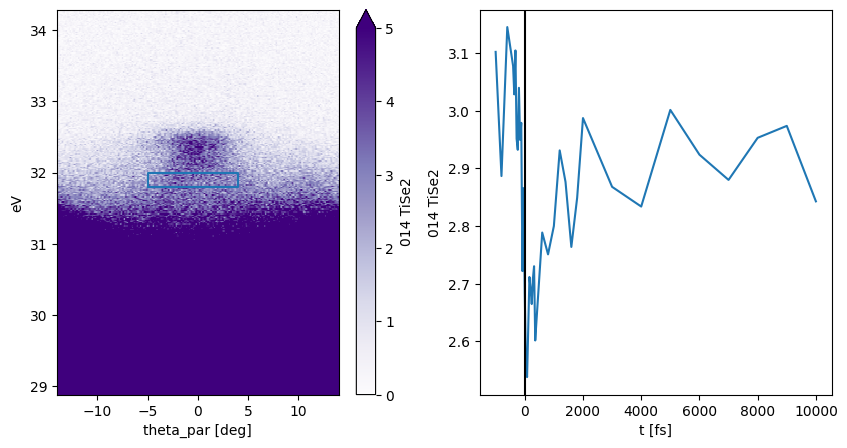

In [17]:
# Define ROI co-ordinates
ROI1 = {'eV': [31.8,32.0,32.0,31.8], 'theta_par': [-5,-5,4,4]}

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# Show static ARPES
a.static().plot(vmax=5, ax=ax[0])
ROI_plot(ROI1,ax=ax[0],y='eV')  # Plot the ROI

t_slice = a.ROI_select(ROI1)
t_slice.plot(ax=ax[1])
ax[1].axvline(0, color='k')

## Setting t0
There is a helper function `set_t0` to reset the $t_0$ value. Input the value in fs of the desired new $t_0$

In [18]:
b = a.set_t0(-200)

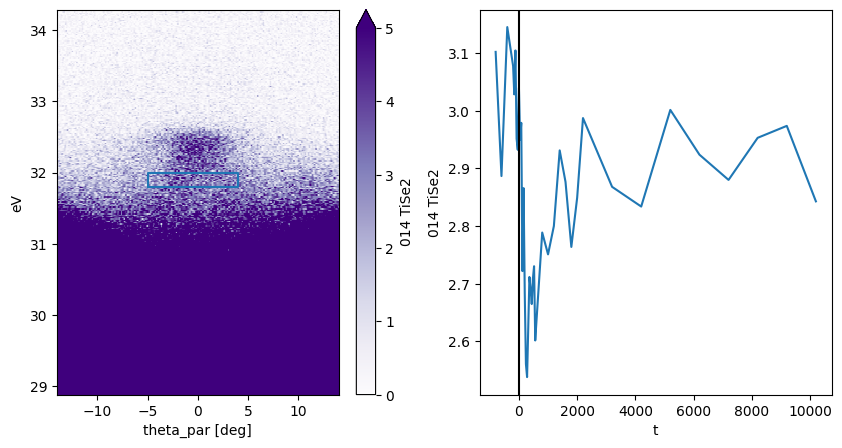

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# Show static ARPES
b.static().plot(vmax=5, ax=ax[0])
ROI_plot(ROI1,ax=ax[0],y='eV')  # Plot the ROI

t_slice = b.ROI_select(ROI1)
t_slice.plot(ax=ax[1])
ax[1].axvline(0, color='k')

## Difference spectra
The helper function `t_diff` plots differences from the static ARPES

In [20]:
help(t_diff)

Help on function t_diff in module peaks.display.trARPES:

t_diff(data, t_select, t_static=-250)
    Calculate the difference spectrum of the ARPES at some time point
    or time window and the static ARPES
    
    Parameters
    -----------
    data : xr.DataArray
        raw data (E vs ang vs t)
    
    t_select : float or slice
        time to select data over
    
    t_static : float, optional
        time point to assume static up to (fs)
        default = -250 fs



Can do this to a single time point, or can take a slice over a range to average over that range. The static ARPES is averaged over the range before t_static, which defaults to -250 fs

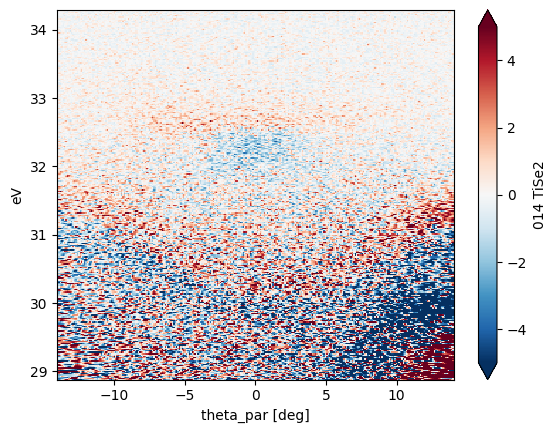

In [21]:
a.t_diff(slice(200,300), t_static=-200).plot(vmax=5)

In [22]:
a.sel(t=1000, method='nearest')

<xarray.DataArray '014 TiSe2' (eV: 480, theta_par: 280)>
dask.array<getitem, shape=(480, 280), dtype=float64, chunksize=(480, 280), chunktype=numpy.ndarray>
Coordinates:
    t          float64 1e+03
  * eV         (eV) float64 28.88 28.9 28.91 28.92 ... 34.25 34.26 34.27 34.28
  * theta_par  (theta_par) float64 -14.0 -13.9 -13.8 -13.7 ... 13.8 13.9 14.0
    delay_pos  float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    scan_name:           014 TiSe2
    scan_type:           dispersion t-series
    sample_description:  None
    eV_type:             kinetic
    beamline:            Artemis
    analysis_history:    ["Data cropped on load: {'theta_par': slice(-14, 14,...
    EF_correction:       None
    PE:                  30.0
    hv:                  None
    pol:                 None
    sweeps:              200
    dwell:               None
    ana_mode:            WideAngleMode
    ana_slit:            None
    ana_slit_angle:      90
    exit_slit:           None
    defl_par:            None
    defl_perp:           None
    x1:                  None
    x2:                  None
    x3:                  None
    polar:               None
    tilt:                None
    azi:                 None
    norm_polar:          None
    norm_tilt:           None
    norm_azi:            None
    temp_sample:         78.48
    temp_variation:      [78.469 78.471 78.466 78.456 78.451 78.45  78.466 78...
    temp_cryo:           None
    counts:              [3974.25  4060.7   4088.075 4084.1   4106.425 4112.2...
    t0:                  5.655